In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd

from pyclustering.cluster.kmedoids import kmedoids

from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist

from scipy.special import comb as combination

import itertools as it

import random

import time


# Ptos de Parada

In [103]:
ptos_parada = pd.read_excel('/Users/guilistocco/Documents/TCC 2 - Ônibus/BancoDados/Dados brutos/_PontosEletrico_.xlsx').sort_values('Densidade', ascending=False)
ptos_parada

,Ponto,Ordem,Lat,Long,Densidade
0,1,FEC / RS,-22.815664,-47.062650,175527.01560
1,2,RU / BCCL,-22.816567,-47.072617,161245.95310
2,3,ADunicamp (Associação de Docentes da Unicamp),-22.813326,-47.065407,134607.79690
3,4,IC / Pavilhão do IA,-22.815047,-47.064360,131100.25000
4,5,CEPETRO / Funcamp,-22.812777,-47.067752,103630.47660
5,6,NEPP / IC,-22.814714,-47.064024,98755.28906
6,7,FEA / Praça da Paz,-22.821312,-47.067412,95977.38281
7,8,CECI Berçário / FEA,-22.821001,-47.068121,91303.71094
8,9,IB / SIARQ,-22.819147,-47.072227,86938.40625
9,10,IQ / FEA,-22.819335,-47.067119,75935.28125


In [104]:
np.sqrt(	(-47.062650 - -47.072617)**2 +   (-22.816567 - -22.815664)**2	) *63710

637.5983294864873

# Gera matriz de distancias


diferenca entre lat e long dao resultado em que unidade?

In [105]:
# diferenca entre lat e long dao resultado em que unidade? --> tem mais uma funcao pra transformar isso em metro

data = ptos_parada[['Lat','Long']].values

ctys = ptos_parada['Ponto'].values

df = pd.DataFrame(data, columns=['xcord', 'ycord'], index=ctys)
dm_ptos_parada = pd.DataFrame(cdist(df.values, df.values), index=df.index, columns=df.index) * 2* 60000 # tranformar distancia de milhas nauticas em metros

## troca o index e as colunas para ficar compativel com a logica da combinaria abaixo
dm_ptos_parada.columns = [i for i in range(0,35)]
dm_ptos_parada.reset_index(drop=True, inplace=True)

dm_ptos_parada

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.000000,1200.948836,433.752154,218.143673,703.446221,200.459995,886.511702,917.177354,1222.875029,694.048846,...,1525.485149,4110.216881,1634.623930,292.582672,1681.035488,480.866038,316.700017,1141.827578,1392.941491,1382.404306
1,1200.948836,0.000000,948.587160,1007.511556,739.977893,1054.880542,845.263947,757.778396,313.159863,738.654512,...,1432.071297,4278.324990,1657.090514,1158.076490,2067.085230,1567.722234,1163.183929,851.255919,1860.753051,1850.228456
2,433.752154,948.587160,0.000000,241.688114,289.032227,235.082481,988.048389,976.868434,1075.949094,749.762711,...,1706.805225,3812.083375,1860.404714,633.156739,2013.660483,914.510229,655.822445,1207.132590,1734.893549,1723.851669
3,218.143673,1007.511556,241.688114,0.000000,489.758048,56.766221,836.296394,845.124757,1064.567259,611.922931,...,1529.849543,4022.154878,1666.459918,393.069748,1784.499934,687.782538,416.267091,1077.516070,1502.657887,1491.708204
4,703.446221,739.977893,289.032227,489.758048,0.000000,504.125005,1024.977022,987.813077,934.104614,790.560123,...,1752.829537,3752.806472,1932.348754,846.310322,2160.655534,1177.456224,865.616410,1201.037506,1894.239033,1883.031627
5,200.459995,1054.880542,235.082481,56.766221,504.125005,0.000000,890.076258,900.532857,1118.914760,667.458643,...,1578.954890,3984.245257,1711.828847,417.500319,1816.164798,680.149198,441.550464,1132.740811,1532.446057,1521.579891
6,886.511702,845.263947,988.048389,836.296394,1024.977022,890.076258,0.000000,92.961815,633.551222,239.839027,...,728.803697,4773.701912,910.669740,649.451810,1232.088697,994.218897,635.816944,258.152649,1015.689100,1005.116528
7,917.177354,757.778396,976.868434,845.124757,987.813077,900.532857,92.961815,0.000000,540.594019,233.279689,...,768.675328,4740.519360,964.032478,699.822098,1313.211457,1062.369318,688.654841,232.733750,1103.318906,1092.860790
8,1222.875029,313.159863,1075.949094,1064.567259,934.104614,1118.914760,633.551222,540.594019,0.000000,613.326699,...,1135.083996,4574.648692,1364.737181,1104.919896,1809.676261,1509.296318,1103.331767,571.668225,1625.940469,1615.955059
9,694.048846,738.654512,749.762711,611.922931,790.560123,667.458643,239.839027,233.279689,613.326699,0.000000,...,967.347111,4535.322282,1141.789784,507.802079,1413.297557,901.151158,501.957729,465.923553,1171.732349,1160.681075


In [106]:
dm_ptos_parada.describe()


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,987.534245,1197.939494,1070.015531,958.680680,1137.194744,988.268369,840.864598,857.458276,1115.946664,824.754108,...,1156.791389,4541.288664,1256.222204,881.165435,1435.011623,1094.451699,878.006336,941.870168,1234.640789,1226.472428
std,717.664387,728.161767,730.357091,730.053380,736.875332,729.239830,754.875084,752.831664,735.716663,721.680183,...,920.196634,1007.254285,961.915138,716.718303,970.221936,712.314713,716.583599,788.417939,917.134098,914.790347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,485.862245,762.723221,574.512531,487.242212,622.692419,508.870173,541.235439,551.032412,731.663894,504.879904,...,715.282716,4054.462939,618.111945,430.338945,772.527014,735.147411,451.086712,562.212683,704.291542,700.114972
50%,917.177354,1091.129915,976.868434,845.124757,1024.977022,897.895254,836.296394,836.337032,1072.093179,720.845567,...,1135.083996,4574.648692,1315.200163,846.310322,1376.705357,1071.175978,842.094186,907.294486,1103.318906,1092.860790
75%,1251.299832,1533.653145,1437.596644,1242.739834,1520.393765,1288.422400,987.009132,973.784083,1305.394048,934.249135,...,1527.667346,5160.896745,1661.775216,1108.131109,1812.920530,1343.699943,1097.474019,1103.337908,1568.609181,1558.704765
max,4110.216881,4278.324990,3812.083375,4022.154878,3752.806472,3984.245257,4773.701912,4740.519360,4574.648692,4535.322282,...,5502.457841,5791.249760,5669.695431,4392.730754,5791.249760,4476.137725,4417.388583,4951.637239,5502.937332,5492.456571


# Calculando as combinacoes de pontos de parada

 - Como visto acima tem muitas combinacoes a serem geradas 

 - Se somasse de 35Cr1 a 35Cr35 sao 34_359_738_366 TRINTA E QUATRO TRILHOES DE COMBIINACOES           --> '_'

 - Nao tem armazenamento razoavel nem pra GERAR todas as combinacoes, esse crescimento eh exponencial e muito rapido

 - POR SORTE o Kmedianas nao precisa testar todas as combinacoes para convergir para os pontos mais representativos (k melhores medianas)

 - Pq quando ele roda com um chute inicial qualquer ele ja sugere novas medianas que otimizaram melhor o metodo

 - entao com 100_000 iteracoes (arbitario) , vai ter bastante espaco amostral pra ter boas medianas
 
 - Alem disso quando usamos matrizes de distancias pra calcular, que sera o caso , melhora a performance

 - 4_537_567_650 35Cr17 



In [107]:
4_537_567_650 * 0.01    #   453_756_765 1%    45_375_676 10%

45375676.5

## Numero de combinacoes a cada 35 escolhe N

In [108]:
smoo = 0
for n_ptos in range(1,36):
    smoo += combination(35,n_ptos, exact=True)
    print('numero de combinacoes usando 35 escolhe {}'.format(n_ptos), combination(35,n_ptos, exact=True))
# 183579396
print(smoo)
# 35Cr17 --> 4_537_567_650 --> 4 trilhoes

numero de combinacoes usando 35 escolhe 1 35
numero de combinacoes usando 35 escolhe 2 595
numero de combinacoes usando 35 escolhe 3 6545
numero de combinacoes usando 35 escolhe 4 52360
numero de combinacoes usando 35 escolhe 5 324632
numero de combinacoes usando 35 escolhe 6 1623160
numero de combinacoes usando 35 escolhe 7 6724520
numero de combinacoes usando 35 escolhe 8 23535820
numero de combinacoes usando 35 escolhe 9 70607460
numero de combinacoes usando 35 escolhe 10 183579396
numero de combinacoes usando 35 escolhe 11 417225900
numero de combinacoes usando 35 escolhe 12 834451800
numero de combinacoes usando 35 escolhe 13 1476337800
numero de combinacoes usando 35 escolhe 14 2319959400
numero de combinacoes usando 35 escolhe 15 3247943160
numero de combinacoes usando 35 escolhe 16 4059928950
numero de combinacoes usando 35 escolhe 17 4537567650
numero de combinacoes usando 35 escolhe 18 4537567650
numero de combinacoes usando 35 escolhe 19 4059928950
numero de combinacoes usan

## Geracao de cada combinacao individualmente de cada 35 escolhe N



In [109]:
# combs --> guarda todas as combinacoes de pontos 35 escolhe N, uma em cada indice
# combs[N-1] --> tem o len() do resultado da combinacao 35CrN
# combs[N][k] --> conteum uma combinacao das 35CrN, um array
# combs[N][k][0] --> necessario para acessar os itens do array


In [110]:
escolhe_35 = [n for n in range (0,35)]

combinacoes = []
for chnc in range(1,36) :
    tic = time.perf_counter()
    totais = []
    i = 0 

    while (    len (set (totais)) != 10_000    ) and (    combination(35, chnc, exact = True) != len(set(totais)) ):
        totais.append(tuple(random.sample(escolhe_35,chnc)))
        # print( len(set(totais)))
        # print (totais)
        i +=1
    combinacoes.append(set(totais))
    tac = time.perf_counter()

    # print(len(set(totais)),len(totais), end = "")
    print(' 35 escolher {} contem --> {}, foram geradas {} amostras'.format(chnc,len(combinacoes[chnc-1]), len(totais)), f'\t tempo de processamento da comb  {tac - tic:0.4f}', )


# 2'30'' pra calcular 10_000
# TEMPO DEMAIS para calcular 100_000


 35 escolher 1 contem --> 35, foram geradas 122 amostras 	 tempo de processamento da comb  0.0009
 35 escolher 2 contem --> 595, foram geradas 874 amostras 	 tempo de processamento da comb  0.0178
 35 escolher 3 contem --> 6545, foram geradas 7173 amostras 	 tempo de processamento da comb  1.4588
 35 escolher 4 contem --> 10000, foram geradas 10030 amostras 	 tempo de processamento da comb  3.0548
 35 escolher 5 contem --> 10000, foram geradas 10001 amostras 	 tempo de processamento da comb  3.3292
 35 escolher 6 contem --> 10000, foram geradas 10000 amostras 	 tempo de processamento da comb  3.4576
 35 escolher 7 contem --> 10000, foram geradas 10000 amostras 	 tempo de processamento da comb  3.9183
 35 escolher 8 contem --> 10000, foram geradas 10000 amostras 	 tempo de processamento da comb  3.8436
 35 escolher 9 contem --> 10000, foram geradas 10000 amostras 	 tempo de processamento da comb  3.9440
 35 escolher 10 contem --> 10000, foram geradas 10000 amostras 	 tempo de processame

In [111]:
### Salva lista pra nao ter que recalcular

# data_ = np.array(combinacoes)
# np.savez("minhas_combinacoes", data_)

In [112]:
## Le o arquivo minhas_combinacoes    
    
# a = np.load("minhas_combinacoes.npz") #make sure you use the .npz!
# b = a['arr_0']

## Roda o K medianas

In [113]:
## pego uma serie de medianas
    ## rodo o kamedias e ele adequa quais ptos de onibus serao representados por essas medianas
    ## calculo distancia 
    ## guardo a menor distancia e a quais pontos ela corresponte

### Funcao de calcular a distancia entre os pontos representativos (medoid) e os pontos q ele representa

In [114]:
## funcao de calcular a distancia entre os pontos representativos (medoid) e 
#           os pontos q ele representa

def calcula_dist_medoids(df, clusters, medoids):

    dist = 0
    for idx, cl in enumerate(clusters):
        # print('this is cl', cl)
        # print('this is md cl\t -->',medoids[idx], cl )

        dist += df.loc[ cl , medoids[idx]  ].sum()

        # display(df.loc[ cl , medoids[idx]  ])
        # print(dist)

    return dist

# clusters=[10,12]
# medoids = [[1,2,3,4,5,6,7,8,9], [10,11,12,13,14,15,16]]
# calcula_dist_medoids(dm_ptos_parada, clusters, medoids)


### Roda o k medoids pra todos os os pontos

sao tres criterios de parada 
(um minuto rodando o kmedoids) ou (1000 iteracoes) ou (ja rodou todas as combinacoes)

In [115]:
k_medoids_clusters = []
k_medoids_medoids = []

# N vai de 0 a 34
for combs_ in range(0,len(combinacoes)):

    # print('N', N,'len combinacoes', len(combinacoes))
    print(combs_+1,'----------------------------------------------------------------------')
    sum_ = 10000000000    ### sum_ comeca com 10000 e deve ser minimizado
    tic = time.perf_counter()
    tac = 0
    i = 0
    ## sao tres criterios de parada
    ## (um minuto rodando o kmedoids) ou (1000 iteracoes) ou (ja rodou todas as combinacoes)
    while (tac - tic) < 30  and (i!=10_000) and (i!=len(combinacoes[combs_])): ## 60 e 600 sao 1 and 10 minutos para o processsamento ocorrer

        combo = combinacoes[combs_]
        cmb = list(combo)[i]
        # print(cmb)
        kmedoids_instance = kmedoids(dm_ptos_parada.values, [c for c in cmb], data_type='distance_matrix')
        kmedoids_instance.process()
        clusters = kmedoids_instance.get_clusters()
        medoids = kmedoids_instance.get_medoids()

        minimo_local = calcula_dist_medoids(dm_ptos_parada, clusters, medoids)

        # print('_________________________________________')
        # print([c for c in cmb])
        # print('sum_', minimo_local)
        # print('medoids', medoids)

        if minimo_local < sum_:
            sum_ = minimo_local
            cl_local = clusters
            md_local = medoids
        i += 1
        tac = time.perf_counter()
    
    # k_medoids_clusters.append([])
    # k_medoids_medoids.append([])

    # k_medoids_clusters[combs_].append(cl_local)
    # k_medoids_medoids[combs_].append(md_local)

    k_medoids_clusters.append(cl_local)
    k_medoids_medoids.append(md_local)
    
    print('Duracao da execucao', tac - tic)
    print('qunatidade de iteracoes', i)
    print('distancia minimizada', sum_)
    print('pontos representativos', cl_local)
    print('lista de ptos representadps', md_local)


1 ----------------------------------------------------------------------
Duracao da execucao 0.04613662500923965
qunatidade de iteracoes 35
distancia minimizada 28866.393784454234
pontos representativos [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]
lista de ptos representadps [9]
2 ----------------------------------------------------------------------
Duracao da execucao 1.6440383329900214
qunatidade de iteracoes 595
distancia minimizada 20168.300364706924
pontos representativos [[0, 1, 2, 3, 4, 5, 8, 9, 12, 14, 15, 19, 20, 21, 22, 23, 26, 28, 30, 31], [6, 7, 10, 11, 13, 16, 17, 18, 24, 25, 27, 29, 32, 33, 34]]
lista de ptos representadps [12, 10]
3 ----------------------------------------------------------------------
Duracao da execucao 30.00162295800692
qunatidade de iteracoes 6407
distancia minimizada 16081.529364707008
pontos representativos [[0, 1, 2, 3, 4, 5, 8, 9, 12, 14, 15, 19, 20, 21, 22, 

In [116]:
for medoid in range(len(k_medoids_medoids)):
    print(k_medoids_medoids[medoid])

[9]
[12, 10]
[12, 10, 26]
[3, 26, 17, 7]
[0, 26, 7, 11, 23]
[33, 26, 0, 19, 17, 7]
[3, 31, 26, 33, 7, 17, 19]
[17, 7, 31, 26, 33, 30, 3, 19]
[17, 30, 34, 7, 10, 3, 26, 19, 31]
[10, 17, 1, 7, 31, 26, 23, 3, 30, 34]
[1, 7, 21, 3, 17, 10, 30, 26, 23, 33, 31]
[7, 23, 31, 10, 22, 17, 26, 1, 13, 3, 21, 33]
[7, 26, 28, 23, 9, 1, 22, 13, 17, 21, 3, 10, 33]
[32, 10, 21, 23, 1, 28, 6, 5, 13, 12, 26, 17, 33, 22]
[11, 33, 7, 18, 23, 5, 14, 28, 1, 13, 26, 15, 21, 17, 30]
[33, 31, 8, 17, 7, 15, 23, 5, 13, 18, 21, 9, 20, 26, 22, 11]
[11, 21, 26, 33, 7, 8, 20, 18, 5, 13, 23, 1, 22, 28, 17, 14, 15]
[23, 18, 15, 6, 22, 26, 33, 10, 5, 1, 20, 13, 32, 17, 21, 8, 31, 9]
[23, 13, 20, 18, 17, 6, 26, 21, 10, 8, 29, 22, 28, 32, 1, 12, 33, 5, 9]
[16, 17, 18, 21, 34, 11, 22, 29, 14, 23, 24, 6, 12, 20, 26, 1, 28, 5, 13, 8]
[22, 17, 5, 20, 8, 29, 18, 23, 1, 16, 13, 28, 26, 14, 34, 6, 21, 12, 32, 10, 2]
[16, 13, 26, 23, 18, 17, 29, 33, 22, 8, 14, 21, 28, 5, 1, 10, 2, 12, 24, 9, 6, 20]
[33, 23, 18, 26, 20, 14, 21, 2,

In [117]:
for cluster in range(len(k_medoids_clusters)):
    print(k_medoids_clusters[cluster])

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]
[[0, 1, 2, 3, 4, 5, 8, 9, 12, 14, 15, 19, 20, 21, 22, 23, 26, 28, 30, 31], [6, 7, 10, 11, 13, 16, 17, 18, 24, 25, 27, 29, 32, 33, 34]]
[[0, 1, 2, 3, 4, 5, 8, 9, 12, 14, 15, 19, 20, 21, 22, 23, 28, 30, 31], [6, 7, 10, 11, 13, 16, 17, 18, 24, 25, 27, 29, 32, 33, 34], [26]]
[[0, 2, 3, 4, 5, 12, 15, 19, 20, 21, 22, 23, 28, 30, 31], [26], [10, 11, 13, 17, 18, 25, 27, 29, 33, 34], [1, 6, 7, 8, 9, 14, 16, 24, 32]]
[[0, 3, 5, 21, 22, 28, 30, 31], [26], [6, 7, 8, 9, 14, 24, 32], [10, 11, 13, 16, 17, 18, 25, 27, 29, 33, 34], [1, 2, 4, 12, 15, 19, 20, 23]]
[[18, 29, 33, 34], [26], [0, 2, 3, 5, 12, 15, 21, 22, 28, 30, 31], [1, 4, 19, 20, 23], [10, 11, 13, 17, 25, 27], [6, 7, 8, 9, 14, 16, 24, 32]]
[[0, 2, 3, 5, 12, 15, 21], [14, 22, 28, 30, 31], [26], [18, 29, 33, 34], [6, 7, 8, 9, 16, 24, 32], [10, 11, 13, 17, 25, 27], [1, 4, 19, 20, 23]]
[[10, 11, 13, 17, 25, 27], 

# proximos passos


- ja temos:
    - entre 2 e 35 quais sao os pontos melhores representados por esses N ptos usando k medoids
    - matriz com 16k viagens entre junho e agosto com o seu ponto de origem e destino

- Agora eh o seguinte:
    - mapear as viagens que tem origem e destino em PONTO INICIAL E FINAL OLD E NEW agora com os pontos mapeados pelos mais representativos
    - fazer 35-1 matrizes OD, uma com todas as viagens de 2x2, outra com 3x3, ate 35x35 
    - calcular a diagonal de cada uma delas, dividir pelo total de viagens e assim calcular o erro
    - essa eh a curva de erro que vamo escolher o numero de pontos de onibus vamos usar
    - e melhor, ja vem com QUAIS sao os pontos

# Acessando arquivos


In [118]:
viagens_validas = pd.read_excel('/Users/guilistocco/Documents/TCC 2 - Ônibus/BancoDados/Dados brutos/viagens_mapeadas.xlsx', index_col='Unnamed: 0')
viagens_validas.columns = ['index_col', 'day', 'device_id', 'periodo', 'dataInicio', 'dataFim',
       'sequence', 'distance(m)', 'duration(s)', 'latitudeI', 'longitudeI',
       'latitudeF', 'longitudeF', 'Nome_PontoI', 'Nome_PontoF', 'PontoFinal',
       'dist_PontoF', 'PontoInicial', 'dist_PontoI']

viagens_validas = viagens_validas[[  'index_col', 'day', 'device_id', 'periodo', 'dataInicio', 'dataFim',
       'sequence', 'distance(m)', 'duration(s)', 'PontoInicial','Nome_PontoI','latitudeI', 'longitudeI','dist_PontoI',
       'PontoFinal','Nome_PontoF','latitudeF', 'longitudeF',  'dist_PontoF'  ]]
viagens_validas['PontoInicial']    = viagens_validas['PontoInicial']    -1
viagens_validas['PontoFinal']      = viagens_validas['PontoFinal']      -1
viagens_validas

,index_col,day,device_id,periodo,dataInicio,dataFim,sequence,distance(m),duration(s),PontoInicial,Nome_PontoI,latitudeI,longitudeI,dist_PontoI,PontoFinal,Nome_PontoF,latitudeF,longitudeF,dist_PontoF
0,None_6,1,0,Manha,2021-06-01 06:44:02,2021-06-01 06:45:20,1,333.068136,78.0,33,Hemocentro / FCM,-22.827145,-47.061214,0.001096,29,Escola Sérgio P. Porto (PONTO INICIAL),-22.829490,-47.060281,0.000124
1,None_6,1,0,Manha,2021-06-01 07:58:17,2021-06-01 07:59:35,4,362.164440,78.0,34,Hemocentro / FCM,-22.827037,-47.061207,0.001011,29,Escola Sérgio P. Porto (PONTO FINAL),-22.829638,-47.060359,0.000179
2,None_6,1,0,Manha,2021-06-01 09:06:10,2021-06-01 09:07:28,6,350.063969,78.0,33,Hemocentro / FCM,-22.827116,-47.061166,0.000957,29,Escola Sérgio P. Porto (PONTO INICIAL),-22.829648,-47.060414,0.000180
3,None_6,1,0,Manha,2021-06-01 11:10:03,2021-06-01 11:11:21,7,361.522224,78.0,34,Hemocentro / FCM,-22.827030,-47.061240,0.001020,29,Escola Sérgio P. Porto (PONTO FINAL),-22.829614,-47.060350,0.000153
4,None_6,1,0,Manha,2021-06-01 11:57:21,2021-06-01 11:58:42,9,339.187065,81.0,33,Hemocentro / FCM,-22.827211,-47.061172,0.000860,29,Escola Sérgio P. Porto (PONTO INICIAL),-22.829681,-47.060513,0.000156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14483,None_8,31,92524,Manha,2021-08-31 12:57:57,2021-08-31 12:59:37,1,527.011253,100.0,13,HC (Portaria F1),-22.829433,-47.064937,0.000081,11,CECOM,-22.825647,-47.066167,0.001011
14484,None_8,31,93049,Tarde,2021-08-31 15:31:56,2021-08-31 15:33:16,1,825.952595,80.0,25,CECOM,-22.826262,-47.067667,0.001754,13,Sobrapar,-22.831246,-47.063677,0.001125
14485,None_8,31,93049,Tarde,2021-08-31 15:31:56,2021-08-31 15:33:16,2,825.952595,80.0,25,CECOM,-22.826262,-47.067667,0.001754,13,Sobrapar,-22.831246,-47.063677,0.001125
14486,None_8,31,93166,Tarde,2021-08-31 16:19:17,2021-08-31 16:23:33,1,821.356800,256.0,13,DGA / Praça das Bandeiras,-22.831021,-47.063912,0.000265,10,CECOM,-22.824985,-47.065243,0.001511


In [119]:
k_medoids_clusters
k_medoids_medoids
len(k_medoids_medoids)

35

# Gerando dicionarios de mapeamento dos novos pontos representativos

In [120]:
## k_medoids_medoids e k_medoids_clusters tem o mesmo tamanho
blabla = []


for pair in range(len(k_medoids_medoids)):
    print(pair+1,'------------------------------------------------------------------------------------------------------')
    print('k_medoids_medoids', k_medoids_medoids[pair])

    for pair_ in range(len(k_medoids_medoids[pair])):
        print('\t',pair+1, '.', pair_+1,'k_medoids_medoids', k_medoids_medoids[pair][pair_])
        print('\t',pair+1,'.', pair_+1,'k_medoids_clusters', k_medoids_clusters[pair][pair_])

1 ------------------------------------------------------------------------------------------------------
k_medoids_medoids [9]
	 1 . 1 k_medoids_medoids 9
	 1 . 1 k_medoids_clusters [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
2 ------------------------------------------------------------------------------------------------------
k_medoids_medoids [12, 10]
	 2 . 1 k_medoids_medoids 12
	 2 . 1 k_medoids_clusters [0, 1, 2, 3, 4, 5, 8, 9, 12, 14, 15, 19, 20, 21, 22, 23, 26, 28, 30, 31]
	 2 . 2 k_medoids_medoids 10
	 2 . 2 k_medoids_clusters [6, 7, 10, 11, 13, 16, 17, 18, 24, 25, 27, 29, 32, 33, 34]
3 ------------------------------------------------------------------------------------------------------
k_medoids_medoids [12, 10, 26]
	 3 . 1 k_medoids_medoids 12
	 3 . 1 k_medoids_clusters [0, 1, 2, 3, 4, 5, 8, 9, 12, 14, 15, 19, 20, 21, 22, 23, 28, 30, 31]
	 3 . 2 k_medoids_medoids 10
	 3 . 2 k_medoids_clu

In [121]:
range(len(k_medoids_medoids))

range(0, 35)

In [122]:
range(len(k_medoids_medoids[pair]))

range(0, 35)

In [123]:
## k_medoids_medoids e k_medoids_clusters tem o mesmo tamanho
mapas_pts_rep = []


for pair in range(len(k_medoids_medoids)):
    print(pair+1,'------------------------------------------------------------------------------------------------------')
    # print('k_medoids_medoids', k_medoids_medoids[pair])
    
    mapas_pts_rep.append([])

    for pair_ in range(len(k_medoids_medoids[pair])):
        # print('\t',pair+1, '.', pair_+1,'k_medoids_medoids', k_medoids_medoids[pair][pair_])
        # print('\t',pair+1,'.', pair_+1,'k_medoids_clusters', k_medoids_clusters[pair][pair_])

        # construir dicionario
        dict_ = dict()
        for aahahha in  k_medoids_clusters[pair][pair_]:
            # print( aahahha, k_medoids_medoids[pair][0])
            dict_[aahahha] = k_medoids_medoids[pair][pair_]

        mapas_pts_rep[pair].append(dict_)
        print(dict_)
        


1 ------------------------------------------------------------------------------------------------------
{0: 9, 1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 9, 10: 9, 11: 9, 12: 9, 13: 9, 14: 9, 15: 9, 16: 9, 17: 9, 18: 9, 19: 9, 20: 9, 21: 9, 22: 9, 23: 9, 24: 9, 25: 9, 26: 9, 27: 9, 28: 9, 29: 9, 30: 9, 31: 9, 32: 9, 33: 9, 34: 9}
2 ------------------------------------------------------------------------------------------------------
{0: 12, 1: 12, 2: 12, 3: 12, 4: 12, 5: 12, 8: 12, 9: 12, 12: 12, 14: 12, 15: 12, 19: 12, 20: 12, 21: 12, 22: 12, 23: 12, 26: 12, 28: 12, 30: 12, 31: 12}
{6: 10, 7: 10, 10: 10, 11: 10, 13: 10, 16: 10, 17: 10, 18: 10, 24: 10, 25: 10, 27: 10, 29: 10, 32: 10, 33: 10, 34: 10}
3 ------------------------------------------------------------------------------------------------------
{0: 12, 1: 12, 2: 12, 3: 12, 4: 12, 5: 12, 8: 12, 9: 12, 12: 12, 14: 12, 15: 12, 19: 12, 20: 12, 21: 12, 22: 12, 23: 12, 28: 12, 30: 12, 31: 12}
{6: 10, 7: 10, 10: 10, 11: 10, 1

In [124]:
mapas_pts_rep[1][1]

{6: 10,
 7: 10,
 10: 10,
 11: 10,
 13: 10,
 16: 10,
 17: 10,
 18: 10,
 24: 10,
 25: 10,
 27: 10,
 29: 10,
 32: 10,
 33: 10,
 34: 10}

In [125]:
pivot_try = viagens_validas.copy()

pivot_try['NEW_PontoInicial'] = pivot_try['PontoInicial'].map(mapas_pts_rep[0][0])
pivot_try['NEW_PontoFinal'] = pivot_try['PontoFinal'].map(mapas_pts_rep[0][0])

pivot_try

,index_col,day,device_id,periodo,dataInicio,dataFim,sequence,distance(m),duration(s),PontoInicial,...,latitudeI,longitudeI,dist_PontoI,PontoFinal,Nome_PontoF,latitudeF,longitudeF,dist_PontoF,NEW_PontoInicial,NEW_PontoFinal
0,None_6,1,0,Manha,2021-06-01 06:44:02,2021-06-01 06:45:20,1,333.068136,78.0,33,...,-22.827145,-47.061214,0.001096,29,Escola Sérgio P. Porto (PONTO INICIAL),-22.829490,-47.060281,0.000124,9,9
1,None_6,1,0,Manha,2021-06-01 07:58:17,2021-06-01 07:59:35,4,362.164440,78.0,34,...,-22.827037,-47.061207,0.001011,29,Escola Sérgio P. Porto (PONTO FINAL),-22.829638,-47.060359,0.000179,9,9
2,None_6,1,0,Manha,2021-06-01 09:06:10,2021-06-01 09:07:28,6,350.063969,78.0,33,...,-22.827116,-47.061166,0.000957,29,Escola Sérgio P. Porto (PONTO INICIAL),-22.829648,-47.060414,0.000180,9,9
3,None_6,1,0,Manha,2021-06-01 11:10:03,2021-06-01 11:11:21,7,361.522224,78.0,34,...,-22.827030,-47.061240,0.001020,29,Escola Sérgio P. Porto (PONTO FINAL),-22.829614,-47.060350,0.000153,9,9
4,None_6,1,0,Manha,2021-06-01 11:57:21,2021-06-01 11:58:42,9,339.187065,81.0,33,...,-22.827211,-47.061172,0.000860,29,Escola Sérgio P. Porto (PONTO INICIAL),-22.829681,-47.060513,0.000156,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14483,None_8,31,92524,Manha,2021-08-31 12:57:57,2021-08-31 12:59:37,1,527.011253,100.0,13,...,-22.829433,-47.064937,0.000081,11,CECOM,-22.825647,-47.066167,0.001011,9,9
14484,None_8,31,93049,Tarde,2021-08-31 15:31:56,2021-08-31 15:33:16,1,825.952595,80.0,25,...,-22.826262,-47.067667,0.001754,13,Sobrapar,-22.831246,-47.063677,0.001125,9,9
14485,None_8,31,93049,Tarde,2021-08-31 15:31:56,2021-08-31 15:33:16,2,825.952595,80.0,25,...,-22.826262,-47.067667,0.001754,13,Sobrapar,-22.831246,-47.063677,0.001125,9,9
14486,None_8,31,93166,Tarde,2021-08-31 16:19:17,2021-08-31 16:23:33,1,821.356800,256.0,13,...,-22.831021,-47.063912,0.000265,10,CECOM,-22.824985,-47.065243,0.001511,9,9


In [126]:
agrupamento = pivot_try.groupby(['NEW_PontoInicial','NEW_PontoFinal']).agg({'sequence':'count'}).reset_index()
display(agrupamento.pivot(index= 'NEW_PontoInicial', columns='NEW_PontoFinal', values='sequence').fillna(0))

NEW_PontoFinal,9
NEW_PontoInicial,
9,14488


In [127]:

# pivot_try = viagens_validas.copy()
perdas = []
for a in range(len(mapas_pts_rep)):

    viagens_validas_copy = viagens_validas.copy()
    print('----------------------------------------------------------------------------------------------------------------')
    dic_aux = {}
    
    for b in range(len(mapas_pts_rep[a])):
        dic_aux.update(mapas_pts_rep[a][b])
    

    viagens_validas_copy['NEW_PontoInicial'] = viagens_validas_copy['PontoInicial'].map(dic_aux)
    viagens_validas_copy['NEW_PontoFinal'] = viagens_validas_copy['PontoFinal'].map(dic_aux)



    agrupamento = viagens_validas_copy.groupby(['NEW_PontoInicial','NEW_PontoFinal']).agg({'sequence':'count'}).reset_index()

    OD = agrupamento.pivot(index= 'NEW_PontoInicial', columns='NEW_PontoFinal', values='sequence').fillna(0)
    display(OD)
    diag = (OD.values.trace())
    total = np.sum(OD.values)
    perda = ((diag)/total)*100
    print('Soma da Diagonal ',perda, 'Porcentagem %', (round(perda,2)))
    perdas.append(perda) 




----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,9
NEW_PontoInicial,
9,14488


Soma da Diagonal  100.0 Porcentagem % 100.0
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,10,12
NEW_PontoInicial,,
10,7039,1750
12,1346,4353


Soma da Diagonal  78.63059083379348 Porcentagem % 78.63
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,10,12
NEW_PontoInicial,,
10,7039,1750
12,1346,4353


Soma da Diagonal  78.63059083379348 Porcentagem % 78.63
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,3,7,17
NEW_PontoInicial,,,
3,2706,541,426
7,1415,927,890
17,609,1392,5582


Soma da Diagonal  63.60436223081171 Porcentagem % 63.6
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,0,7,11,23
NEW_PontoInicial,,,,
0,1891,32,211,224
7,517,356,398,364
11,422,1055,5859,501
23,550,366,695,1047


Soma da Diagonal  63.176421866372166 Porcentagem % 63.18
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,0,7,17,19,33
NEW_PontoInicial,,,,,
0,2282,141,214,125,97
7,627,491,293,346,132
17,406,1077,2587,331,1024
19,559,272,554,746,26
33,79,93,670,15,1301


Soma da Diagonal  51.12506902263942 Porcentagem % 51.13
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,3,7,17,19,31,33
NEW_PontoInicial,,,,,,
3,1495,105,132,100,627,35
7,189,378,281,332,347,108
17,234,1029,2587,331,220,1024
19,402,225,554,746,204,26
31,111,11,94,39,278,86
33,30,72,670,15,70,1301


Soma da Diagonal  46.83186085035892 Porcentagem % 46.83
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,3,7,17,19,30,31,33
NEW_PontoInicial,,,,,,,
3,187,105,132,84,488,229,35
7,166,378,281,332,57,313,108
17,212,1029,2587,331,39,203,1024
19,366,225,554,746,111,129,26
30,1118,4,30,16,166,8,34
31,84,7,64,39,78,153,52
33,30,72,670,15,14,56,1301


Soma da Diagonal  38.08669243511872 Porcentagem % 38.09
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,3,7,10,17,19,30,31,34
NEW_PontoInicial,,,,,,,,
3,187,104,88,58,84,488,229,22
7,142,248,174,118,278,50,302,69
10,143,651,259,1044,233,32,144,380
17,95,278,1116,553,154,14,71,603
19,366,212,308,283,746,111,129,2
30,1118,3,47,6,16,166,8,12
31,84,6,60,19,39,78,153,38
34,28,53,238,457,13,14,55,1209


Soma da Diagonal  24.30287134180011 Porcentagem % 24.3
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,1,3,7,10,17,23,30,31,34
NEW_PontoInicial,,,,,,,,,
1,384.0,239.0,187.0,289.0,279.0,304.0,96.0,105.0,24.0
3,53.0,187.0,104.0,88.0,58.0,31.0,488.0,229.0,22.0
7,157.0,127.0,184.0,161.0,94.0,39.0,40.0,295.0,47.0
10,239.0,143.0,579.0,259.0,1044.0,66.0,32.0,144.0,380.0
17,160.0,95.0,236.0,1116.0,553.0,36.0,14.0,71.0,603.0
23,173.0,142.0,38.0,32.0,28.0,18.0,25.0,31.0,0.0
30,16.0,1118.0,1.0,47.0,6.0,2.0,166.0,8.0,12.0
31,26.0,84.0,6.0,60.0,19.0,13.0,78.0,153.0,38.0
34,20.0,28.0,42.0,238.0,457.0,4.0,14.0,55.0,1209.0


Soma da Diagonal  21.48674765323026 Porcentagem % 21.49
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,1,3,7,10,17,21,23,30,31,33
NEW_PontoInicial,,,,,,,,,,
1,384.0,239.0,187.0,289.0,279.0,33.0,304.0,63.0,105.0,24.0
3,53.0,187.0,104.0,88.0,58.0,98.0,31.0,390.0,229.0,22.0
7,157.0,127.0,184.0,161.0,94.0,18.0,39.0,22.0,295.0,47.0
10,239.0,143.0,579.0,259.0,1044.0,21.0,66.0,11.0,144.0,380.0
17,160.0,95.0,236.0,1116.0,553.0,6.0,36.0,8.0,71.0,603.0
21,14.0,1109.0,0.0,0.0,0.0,101.0,2.0,0.0,8.0,0.0
23,173.0,142.0,38.0,32.0,28.0,3.0,18.0,22.0,31.0,0.0
30,2.0,9.0,1.0,47.0,6.0,0.0,0.0,65.0,0.0,12.0
31,26.0,84.0,6.0,60.0,19.0,18.0,13.0,60.0,153.0,38.0


Soma da Diagonal  21.48674765323026 Porcentagem % 21.49
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,1,3,7,10,13,17,21,22,23,31,33
NEW_PontoInicial,,,,,,,,,,,
1,384.0,239.0,187.0,289.0,39.0,240.0,33.0,63.0,304.0,105.0,24.0
3,53.0,187.0,104.0,88.0,21.0,37.0,98.0,390.0,31.0,229.0,22.0
7,157.0,127.0,184.0,161.0,22.0,72.0,18.0,22.0,39.0,295.0,47.0
10,239.0,143.0,579.0,259.0,330.0,714.0,21.0,11.0,66.0,144.0,380.0
13,64.0,25.0,83.0,236.0,24.0,142.0,0.0,1.0,1.0,13.0,207.0
17,96.0,70.0,153.0,880.0,239.0,148.0,6.0,7.0,35.0,58.0,396.0
21,14.0,1109.0,0.0,0.0,0.0,0.0,101.0,0.0,2.0,8.0,0.0
22,2.0,9.0,1.0,47.0,2.0,4.0,0.0,65.0,0.0,0.0,12.0
23,173.0,142.0,38.0,32.0,0.0,28.0,3.0,22.0,18.0,31.0,0.0


Soma da Diagonal  18.856985091109884 Porcentagem % 18.86
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,1,3,7,9,10,13,17,21,22,23,28,33
NEW_PontoInicial,,,,,,,,,,,,
1,384.0,178.0,146.0,142.0,289.0,39.0,240.0,33.0,63.0,304.0,65.0,24.0
3,31.0,146.0,18.0,69.0,71.0,3.0,15.0,95.0,383.0,25.0,153.0,12.0
7,148.0,92.0,86.0,135.0,138.0,20.0,62.0,15.0,9.0,33.0,177.0,37.0
9,41.0,64.0,105.0,50.0,47.0,25.0,35.0,16.0,25.0,16.0,219.0,42.0
10,239.0,129.0,572.0,63.0,259.0,330.0,714.0,21.0,11.0,66.0,102.0,380.0
13,64.0,22.0,79.0,11.0,236.0,24.0,142.0,0.0,1.0,1.0,9.0,207.0
17,96.0,63.0,148.0,18.0,880.0,239.0,148.0,6.0,7.0,35.0,52.0,396.0
21,14.0,1107.0,0.0,6.0,0.0,0.0,0.0,101.0,0.0,2.0,4.0,0.0
22,2.0,9.0,1.0,0.0,47.0,2.0,4.0,0.0,65.0,0.0,0.0,12.0


Soma da Diagonal  17.193539480949752 Porcentagem % 17.19
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,1,5,6,10,12,13,17,21,22,23,28,32,33
NEW_PontoInicial,,,,,,,,,,,,,
1,384.0,146.0,199.0,279.0,93.0,39.0,240.0,33.0,63.0,304.0,65.0,38.0,24.0
5,18.0,123.0,23.0,50.0,26.0,1.0,7.0,95.0,380.0,20.0,141.0,0.0,10.0
6,51.0,116.0,174.0,124.0,32.0,19.0,55.0,25.0,22.0,16.0,325.0,58.0,50.0
10,173.0,103.0,117.0,139.0,16.0,329.0,697.0,16.0,9.0,57.0,95.0,518.0,363.0
12,35.0,30.0,102.0,37.0,8.0,20.0,30.0,3.0,10.0,11.0,66.0,2.0,12.0
13,64.0,19.0,16.0,219.0,6.0,24.0,142.0,0.0,1.0,1.0,9.0,88.0,207.0
17,96.0,62.0,32.0,794.0,8.0,239.0,148.0,6.0,7.0,35.0,52.0,213.0,396.0
21,14.0,1105.0,4.0,0.0,4.0,0.0,0.0,101.0,0.0,2.0,4.0,0.0,0.0
22,2.0,9.0,1.0,46.0,0.0,2.0,4.0,0.0,65.0,0.0,0.0,1.0,12.0


Soma da Diagonal  16.88983986747653 Porcentagem % 16.89
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,1,5,7,11,13,14,15,17,18,21,23,28,30,33
NEW_PontoInicial,,,,,,,,,,,,,,
1,384.0,146.0,146.0,268.0,39.0,81.0,93.0,240.0,21.0,33.0,304.0,65.0,63.0,24.0
5,18.0,123.0,5.0,40.0,1.0,18.0,26.0,7.0,10.0,95.0,20.0,141.0,380.0,10.0
7,148.0,86.0,86.0,127.0,20.0,128.0,13.0,62.0,11.0,15.0,33.0,177.0,9.0,37.0
11,237.0,123.0,572.0,148.0,325.0,49.0,18.0,705.0,77.0,21.0,66.0,101.0,11.0,342.0
13,64.0,19.0,79.0,234.0,24.0,8.0,6.0,142.0,2.0,0.0,1.0,9.0,1.0,207.0
14,19.0,41.0,69.0,24.0,7.0,6.0,23.0,13.0,6.0,13.0,10.0,165.0,18.0,32.0
15,35.0,30.0,49.0,35.0,20.0,54.0,8.0,30.0,3.0,3.0,11.0,66.0,10.0,12.0
17,96.0,62.0,148.0,858.0,239.0,11.0,8.0,148.0,22.0,6.0,35.0,52.0,7.0,396.0
18,2.0,1.0,0.0,32.0,5.0,0.0,1.0,9.0,2.0,0.0,0.0,1.0,0.0,38.0


Soma da Diagonal  16.03395913859746 Porcentagem % 16.03
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,5,7,8,9,11,13,15,17,18,20,21,22,23,31,33
NEW_PontoInicial,,,,,,,,,,,,,,,
5,123.0,5.0,12.0,18.0,40.0,1.0,26.0,7.0,10.0,6.0,95.0,380.0,20.0,141.0,10.0
7,86.0,86.0,141.0,128.0,127.0,20.0,13.0,62.0,11.0,7.0,15.0,9.0,33.0,177.0,37.0
8,130.0,131.0,99.0,71.0,234.0,39.0,77.0,217.0,17.0,173.0,25.0,58.0,226.0,59.0,24.0
9,41.0,69.0,15.0,6.0,24.0,7.0,23.0,13.0,6.0,4.0,13.0,18.0,10.0,165.0,32.0
11,123.0,572.0,214.0,49.0,148.0,325.0,18.0,705.0,77.0,23.0,21.0,11.0,66.0,101.0,342.0
13,19.0,79.0,64.0,8.0,234.0,24.0,6.0,142.0,2.0,0.0,0.0,1.0,1.0,9.0,207.0
15,30.0,49.0,29.0,54.0,35.0,20.0,8.0,30.0,3.0,6.0,3.0,10.0,11.0,66.0,12.0
17,62.0,148.0,86.0,11.0,858.0,239.0,8.0,148.0,22.0,10.0,6.0,7.0,35.0,52.0,396.0
18,1.0,0.0,2.0,0.0,32.0,5.0,1.0,9.0,2.0,0.0,0.0,0.0,0.0,1.0,38.0


Soma da Diagonal  14.066813914964108 Porcentagem % 14.07
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,1,5,7,8,11,13,14,15,17,18,20,21,22,23,28,33
NEW_PontoInicial,,,,,,,,,,,,,,,,
1,4.0,125.0,122.0,0.0,223.0,32.0,64.0,67.0,200.0,15.0,154.0,25.0,48.0,207.0,55.0,2.0
5,12.0,123.0,5.0,0.0,40.0,1.0,18.0,26.0,7.0,10.0,6.0,95.0,380.0,20.0,141.0,10.0
7,99.0,86.0,86.0,42.0,127.0,20.0,128.0,13.0,62.0,11.0,7.0,15.0,9.0,33.0,177.0,37.0
8,86.0,5.0,9.0,9.0,11.0,7.0,7.0,10.0,17.0,2.0,19.0,0.0,10.0,19.0,4.0,22.0
11,142.0,123.0,572.0,72.0,148.0,325.0,49.0,18.0,705.0,77.0,23.0,21.0,11.0,66.0,101.0,342.0
13,47.0,19.0,79.0,17.0,234.0,24.0,8.0,6.0,142.0,2.0,0.0,0.0,1.0,1.0,9.0,207.0
14,15.0,41.0,69.0,0.0,24.0,7.0,6.0,23.0,13.0,6.0,4.0,13.0,18.0,10.0,165.0,32.0
15,29.0,30.0,49.0,0.0,35.0,20.0,54.0,8.0,30.0,3.0,6.0,3.0,10.0,11.0,66.0,12.0
17,61.0,62.0,148.0,25.0,858.0,239.0,11.0,8.0,148.0,22.0,10.0,6.0,7.0,35.0,52.0,396.0


Soma da Diagonal  13.473219215902816 Porcentagem % 13.47
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,1,5,6,8,9,10,13,15,17,18,20,21,22,23,31,32,33
NEW_PontoInicial,,,,,,,,,,,,,,,,,
1,4.0,125.0,95.0,0.0,64.0,216.0,32.0,67.0,200.0,15.0,154.0,25.0,48.0,207.0,55.0,34.0,2.0
5,12.0,123.0,5.0,0.0,18.0,40.0,1.0,26.0,7.0,10.0,6.0,95.0,380.0,20.0,141.0,0.0,10.0
6,29.0,75.0,4.0,0.0,106.0,91.0,12.0,9.0,42.0,8.0,3.0,12.0,4.0,6.0,160.0,42.0,18.0
8,86.0,5.0,9.0,9.0,7.0,11.0,7.0,10.0,17.0,2.0,19.0,0.0,10.0,19.0,4.0,0.0,22.0
9,15.0,41.0,58.0,0.0,6.0,19.0,7.0,23.0,13.0,6.0,4.0,13.0,18.0,10.0,165.0,16.0,32.0
10,103.0,102.0,73.0,51.0,44.0,33.0,324.0,15.0,688.0,72.0,17.0,16.0,9.0,57.0,94.0,518.0,325.0
13,47.0,19.0,8.0,17.0,8.0,217.0,24.0,6.0,142.0,2.0,0.0,0.0,1.0,1.0,9.0,88.0,207.0
15,29.0,30.0,48.0,0.0,54.0,34.0,20.0,8.0,30.0,3.0,6.0,3.0,10.0,11.0,66.0,2.0,12.0
17,61.0,62.0,21.0,25.0,11.0,772.0,239.0,8.0,148.0,22.0,10.0,6.0,7.0,35.0,52.0,213.0,396.0


Soma da Diagonal  12.47929320817228 Porcentagem % 12.48
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,1,5,6,8,9,10,12,13,17,18,20,21,22,23,28,29,32,33
NEW_PontoInicial,,,,,,,,,,,,,,,,,,
1,4.0,125.0,95.0,0.0,64.0,216.0,67.0,32.0,200.0,15.0,154.0,25.0,48.0,207.0,55.0,2.0,34.0,0.0
5,12.0,123.0,5.0,0.0,18.0,40.0,26.0,1.0,7.0,10.0,6.0,95.0,380.0,20.0,141.0,9.0,0.0,1.0
6,29.0,75.0,4.0,0.0,106.0,91.0,9.0,12.0,42.0,8.0,3.0,12.0,4.0,6.0,160.0,18.0,42.0,0.0
8,86.0,5.0,9.0,9.0,7.0,11.0,10.0,7.0,17.0,2.0,19.0,0.0,10.0,19.0,4.0,19.0,0.0,3.0
9,15.0,41.0,58.0,0.0,6.0,19.0,23.0,7.0,13.0,6.0,4.0,13.0,18.0,10.0,165.0,32.0,16.0,0.0
10,103.0,102.0,73.0,51.0,44.0,33.0,15.0,324.0,688.0,72.0,17.0,16.0,9.0,57.0,94.0,323.0,518.0,2.0
12,29.0,30.0,48.0,0.0,54.0,34.0,8.0,20.0,30.0,3.0,6.0,3.0,10.0,11.0,66.0,12.0,2.0,0.0
13,47.0,19.0,8.0,17.0,8.0,217.0,6.0,24.0,142.0,2.0,0.0,0.0,1.0,1.0,9.0,202.0,88.0,5.0
17,61.0,62.0,21.0,25.0,11.0,772.0,8.0,239.0,148.0,22.0,10.0,6.0,7.0,35.0,52.0,392.0,213.0,4.0


Soma da Diagonal  5.03865267807841 Porcentagem % 5.04
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,1,5,6,8,11,12,13,14,16,17,18,20,21,22,23,24,28,29,34
NEW_PontoInicial,,,,,,,,,,,,,,,,,,,
1,4.0,125.0,95.0,0.0,216.0,67.0,32.0,64.0,7.0,200.0,15.0,154.0,25.0,48.0,207.0,27.0,55.0,2.0,0.0
5,12.0,123.0,5.0,0.0,40.0,26.0,1.0,18.0,0.0,7.0,10.0,6.0,95.0,380.0,20.0,0.0,141.0,9.0,1.0
6,29.0,75.0,4.0,0.0,91.0,9.0,12.0,106.0,20.0,42.0,8.0,3.0,12.0,4.0,6.0,22.0,160.0,18.0,0.0
8,86.0,5.0,9.0,9.0,11.0,10.0,7.0,7.0,0.0,17.0,2.0,19.0,0.0,10.0,19.0,0.0,4.0,19.0,3.0
11,103.0,102.0,73.0,51.0,33.0,15.0,324.0,44.0,102.0,688.0,72.0,17.0,16.0,9.0,57.0,416.0,94.0,323.0,2.0
12,29.0,30.0,48.0,0.0,34.0,8.0,20.0,54.0,1.0,30.0,3.0,6.0,3.0,10.0,11.0,1.0,66.0,12.0,0.0
13,47.0,19.0,8.0,17.0,217.0,6.0,24.0,8.0,17.0,142.0,2.0,0.0,0.0,1.0,1.0,71.0,9.0,202.0,5.0
14,15.0,41.0,58.0,0.0,19.0,23.0,7.0,6.0,5.0,13.0,6.0,4.0,13.0,18.0,10.0,11.0,165.0,32.0,0.0
16,39.0,21.0,36.0,21.0,13.0,3.0,1.0,5.0,0.0,17.0,5.0,6.0,5.0,2.0,9.0,47.0,7.0,16.0,1.0


Soma da Diagonal  4.707344008834897 Porcentagem % 4.71
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,1,2,5,6,8,10,12,13,14,16,17,18,20,21,22,23,28,29,32,34
NEW_PontoInicial,,,,,,,,,,,,,,,,,,,,
1,4.0,30.0,95.0,95.0,0.0,216.0,67.0,32.0,64.0,7.0,200.0,15.0,154.0,25.0,48.0,207.0,55.0,2.0,27.0,0.0
2,6.0,0.0,31.0,2.0,0.0,2.0,12.0,0.0,2.0,0.0,0.0,0.0,3.0,40.0,3.0,11.0,23.0,0.0,0.0,0.0
5,6.0,43.0,49.0,3.0,0.0,38.0,14.0,1.0,16.0,0.0,7.0,10.0,3.0,55.0,377.0,9.0,118.0,9.0,0.0,1.0
6,29.0,17.0,58.0,4.0,0.0,91.0,9.0,12.0,106.0,20.0,42.0,8.0,3.0,12.0,4.0,6.0,160.0,18.0,22.0,0.0
8,86.0,1.0,4.0,9.0,9.0,11.0,10.0,7.0,7.0,0.0,17.0,2.0,19.0,0.0,10.0,19.0,4.0,19.0,0.0,3.0
10,103.0,27.0,75.0,73.0,51.0,33.0,15.0,324.0,44.0,102.0,688.0,72.0,17.0,16.0,9.0,57.0,94.0,323.0,416.0,2.0
12,29.0,7.0,23.0,48.0,0.0,34.0,8.0,20.0,54.0,1.0,30.0,3.0,6.0,3.0,10.0,11.0,66.0,12.0,1.0,0.0
13,47.0,3.0,16.0,8.0,17.0,217.0,6.0,24.0,8.0,17.0,142.0,2.0,0.0,0.0,1.0,1.0,9.0,202.0,71.0,5.0
14,15.0,5.0,36.0,58.0,0.0,19.0,23.0,7.0,6.0,5.0,13.0,6.0,4.0,13.0,18.0,10.0,165.0,32.0,11.0,0.0


Soma da Diagonal  4.196576477084483 Porcentagem % 4.2
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,1,2,5,6,8,9,10,12,13,14,...,17,18,20,21,22,23,24,28,29,33
NEW_PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,4.0,30.0,95.0,95.0,0.0,33.0,216.0,67.0,32.0,31.0,...,200.0,15.0,154.0,25.0,48.0,207.0,27.0,55.0,2.0,0.0
2,6.0,0.0,31.0,2.0,0.0,0.0,2.0,12.0,0.0,2.0,...,0.0,0.0,3.0,40.0,3.0,11.0,0.0,23.0,0.0,0.0
5,6.0,43.0,49.0,3.0,0.0,6.0,38.0,14.0,1.0,10.0,...,7.0,10.0,3.0,55.0,377.0,9.0,0.0,118.0,9.0,1.0
6,29.0,17.0,58.0,4.0,0.0,22.0,91.0,9.0,12.0,84.0,...,42.0,8.0,3.0,12.0,4.0,6.0,22.0,160.0,18.0,0.0
8,86.0,1.0,4.0,9.0,9.0,4.0,11.0,10.0,7.0,3.0,...,17.0,2.0,19.0,0.0,10.0,19.0,0.0,4.0,19.0,3.0
9,6.0,0.0,10.0,57.0,0.0,0.0,15.0,18.0,2.0,1.0,...,10.0,4.0,3.0,3.0,13.0,6.0,11.0,19.0,10.0,0.0
10,103.0,27.0,75.0,73.0,51.0,6.0,33.0,15.0,324.0,38.0,...,688.0,72.0,17.0,16.0,9.0,57.0,416.0,94.0,323.0,2.0
12,29.0,7.0,23.0,48.0,0.0,44.0,34.0,8.0,20.0,10.0,...,30.0,3.0,6.0,3.0,10.0,11.0,1.0,66.0,12.0,0.0
13,47.0,3.0,16.0,8.0,17.0,4.0,217.0,6.0,24.0,4.0,...,142.0,2.0,0.0,0.0,1.0,1.0,71.0,9.0,202.0,5.0


Soma da Diagonal  4.1896742131419105 Porcentagem % 4.19
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,1,2,5,7,8,9,10,12,13,14,...,18,20,21,23,24,29,30,31,32,33
NEW_PontoInicial,,,,,,,,,,,,,,,,,,,,,
1,4.0,30.0,95.0,95.0,0.0,33.0,216.0,67.0,32.0,31.0,...,15.0,154.0,25.0,207.0,0.0,2.0,48.0,55.0,27.0,0.0
2,6.0,0.0,31.0,2.0,0.0,0.0,2.0,12.0,0.0,2.0,...,0.0,3.0,40.0,11.0,0.0,0.0,3.0,23.0,0.0,0.0
5,6.0,43.0,49.0,3.0,0.0,6.0,38.0,14.0,1.0,10.0,...,10.0,3.0,55.0,9.0,0.0,9.0,377.0,118.0,0.0,1.0
7,29.0,17.0,58.0,4.0,0.0,22.0,91.0,9.0,12.0,84.0,...,8.0,3.0,12.0,6.0,1.0,18.0,4.0,160.0,21.0,0.0
8,86.0,1.0,4.0,9.0,9.0,4.0,11.0,10.0,7.0,3.0,...,2.0,19.0,0.0,19.0,0.0,19.0,10.0,4.0,0.0,3.0
9,6.0,0.0,10.0,57.0,0.0,0.0,15.0,18.0,2.0,1.0,...,4.0,3.0,3.0,6.0,0.0,10.0,13.0,19.0,11.0,0.0
10,103.0,27.0,75.0,73.0,51.0,6.0,33.0,15.0,324.0,38.0,...,72.0,17.0,16.0,57.0,103.0,323.0,9.0,94.0,313.0,2.0
12,29.0,7.0,23.0,48.0,0.0,44.0,34.0,8.0,20.0,10.0,...,3.0,6.0,3.0,11.0,0.0,12.0,10.0,66.0,1.0,0.0
13,47.0,3.0,16.0,8.0,17.0,4.0,217.0,6.0,24.0,4.0,...,2.0,0.0,0.0,1.0,17.0,202.0,1.0,9.0,54.0,5.0


Soma da Diagonal  4.155162893429045 Porcentagem % 4.16
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,0,1,2,5,6,8,9,10,13,14,...,18,20,21,23,24,28,29,30,32,33
NEW_PontoInicial,,,,,,,,,,,,,,,,,,,,,
0,13.0,2.0,32.0,6.0,0.0,0.0,4.0,21.0,0.0,2.0,...,7.0,1.0,13.0,1.0,0.0,44.0,5.0,247.0,0.0,0.0
1,50.0,4.0,30.0,45.0,95.0,0.0,33.0,216.0,32.0,31.0,...,15.0,154.0,25.0,207.0,0.0,55.0,2.0,48.0,27.0,0.0
2,25.0,6.0,0.0,6.0,2.0,0.0,0.0,2.0,0.0,2.0,...,0.0,3.0,40.0,11.0,0.0,23.0,0.0,3.0,0.0,0.0
5,29.0,4.0,11.0,1.0,3.0,0.0,2.0,17.0,1.0,8.0,...,3.0,2.0,42.0,8.0,0.0,74.0,4.0,130.0,0.0,1.0
6,21.0,29.0,17.0,37.0,4.0,0.0,22.0,91.0,12.0,84.0,...,8.0,3.0,12.0,6.0,1.0,160.0,18.0,4.0,21.0,0.0
8,1.0,86.0,1.0,3.0,9.0,9.0,4.0,11.0,7.0,3.0,...,2.0,19.0,0.0,19.0,0.0,4.0,19.0,10.0,0.0,3.0
9,8.0,6.0,0.0,2.0,57.0,0.0,0.0,15.0,2.0,1.0,...,4.0,3.0,3.0,6.0,0.0,19.0,10.0,13.0,11.0,0.0
10,16.0,103.0,27.0,59.0,73.0,51.0,6.0,33.0,324.0,38.0,...,72.0,17.0,16.0,57.0,103.0,94.0,323.0,9.0,313.0,2.0
13,6.0,47.0,3.0,10.0,8.0,17.0,4.0,217.0,24.0,4.0,...,2.0,0.0,0.0,1.0,17.0,9.0,202.0,1.0,54.0,5.0


Soma da Diagonal  3.913583655438984 Porcentagem % 3.91
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,0,1,2,3,7,8,9,11,12,13,...,18,20,21,22,23,24,28,29,32,33
NEW_PontoInicial,,,,,,,,,,,,,,,,,,,,,
0,13.0,2.0,32.0,6.0,0.0,0.0,4.0,21.0,0.0,0.0,...,7.0,1.0,13.0,247.0,1.0,0.0,44.0,5.0,0.0,0.0
1,50.0,4.0,30.0,45.0,95.0,0.0,33.0,216.0,22.0,32.0,...,15.0,154.0,25.0,48.0,207.0,0.0,55.0,2.0,27.0,0.0
2,25.0,6.0,0.0,6.0,2.0,0.0,0.0,2.0,4.0,0.0,...,0.0,3.0,40.0,3.0,11.0,0.0,23.0,0.0,0.0,0.0
3,29.0,4.0,11.0,1.0,3.0,0.0,2.0,17.0,8.0,1.0,...,3.0,2.0,42.0,130.0,8.0,0.0,74.0,4.0,0.0,1.0
7,21.0,29.0,17.0,37.0,4.0,0.0,22.0,91.0,3.0,12.0,...,8.0,3.0,12.0,4.0,6.0,1.0,160.0,18.0,21.0,0.0
8,1.0,86.0,1.0,3.0,9.0,9.0,4.0,11.0,3.0,7.0,...,2.0,19.0,0.0,10.0,19.0,0.0,4.0,19.0,0.0,3.0
9,8.0,6.0,0.0,2.0,57.0,0.0,0.0,15.0,2.0,2.0,...,4.0,3.0,3.0,13.0,6.0,0.0,19.0,10.0,11.0,0.0
11,16.0,103.0,27.0,59.0,73.0,51.0,6.0,33.0,3.0,324.0,...,72.0,17.0,16.0,9.0,57.0,103.0,94.0,323.0,313.0,2.0
12,2.0,11.0,1.0,8.0,13.0,0.0,26.0,19.0,0.0,2.0,...,1.0,2.0,0.0,3.0,5.0,0.0,12.0,2.0,0.0,0.0


Soma da Diagonal  3.858365543898399 Porcentagem % 3.86
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,0,1,2,3,4,7,8,9,11,12,...,18,19,20,21,24,29,30,31,32,34
NEW_PontoInicial,,,,,,,,,,,,,,,,,,,,,
0,13.0,2.0,32.0,6.0,0.0,0.0,0.0,4.0,21.0,0.0,...,7.0,1.0,1.0,13.0,0.0,5.0,247.0,44.0,0.0,0.0
1,50.0,4.0,30.0,45.0,103.0,95.0,0.0,33.0,216.0,22.0,...,15.0,104.0,154.0,25.0,0.0,2.0,48.0,55.0,27.0,0.0
2,25.0,6.0,0.0,6.0,9.0,2.0,0.0,0.0,2.0,4.0,...,0.0,2.0,3.0,40.0,0.0,0.0,3.0,23.0,0.0,0.0
3,29.0,4.0,11.0,1.0,5.0,3.0,0.0,2.0,17.0,8.0,...,3.0,3.0,2.0,42.0,0.0,4.0,130.0,74.0,0.0,1.0
4,4.0,47.0,66.0,37.0,0.0,15.0,0.0,9.0,17.0,3.0,...,5.0,8.0,20.0,1.0,0.0,0.0,21.0,15.0,1.0,0.0
7,21.0,29.0,17.0,37.0,3.0,4.0,0.0,22.0,91.0,3.0,...,8.0,3.0,3.0,12.0,1.0,18.0,4.0,160.0,21.0,0.0
8,1.0,86.0,1.0,3.0,13.0,9.0,9.0,4.0,11.0,3.0,...,2.0,6.0,19.0,0.0,0.0,19.0,10.0,4.0,0.0,3.0
9,8.0,6.0,0.0,2.0,4.0,57.0,0.0,0.0,15.0,2.0,...,4.0,2.0,3.0,3.0,0.0,10.0,13.0,19.0,11.0,0.0
11,16.0,103.0,27.0,59.0,39.0,73.0,51.0,6.0,33.0,3.0,...,72.0,18.0,17.0,16.0,103.0,323.0,9.0,94.0,313.0,2.0


Soma da Diagonal  3.7341247929320818 Porcentagem % 3.73
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,0,1,2,4,5,7,8,9,11,12,...,19,20,21,22,24,29,30,31,32,33
NEW_PontoInicial,,,,,,,,,,,,,,,,,,,,,
0,13.0,2.0,32.0,0.0,6.0,0.0,0.0,4.0,21.0,0.0,...,1.0,1.0,13.0,9.0,0.0,5.0,238.0,44.0,0.0,0.0
1,50.0,4.0,30.0,103.0,45.0,95.0,0.0,33.0,216.0,22.0,...,104.0,154.0,25.0,33.0,0.0,2.0,15.0,55.0,27.0,0.0
2,25.0,6.0,0.0,9.0,6.0,2.0,0.0,0.0,2.0,4.0,...,2.0,3.0,40.0,2.0,0.0,0.0,1.0,23.0,0.0,0.0
4,4.0,47.0,66.0,0.0,37.0,15.0,0.0,9.0,17.0,3.0,...,8.0,20.0,1.0,13.0,0.0,0.0,8.0,15.0,1.0,0.0
5,29.0,4.0,11.0,5.0,1.0,3.0,0.0,2.0,17.0,8.0,...,3.0,2.0,42.0,2.0,0.0,4.0,128.0,74.0,0.0,1.0
7,21.0,29.0,17.0,3.0,37.0,4.0,0.0,22.0,91.0,3.0,...,3.0,3.0,12.0,2.0,1.0,18.0,2.0,160.0,21.0,0.0
8,1.0,86.0,1.0,13.0,3.0,9.0,9.0,4.0,11.0,3.0,...,6.0,19.0,0.0,9.0,0.0,19.0,1.0,4.0,0.0,3.0
9,8.0,6.0,0.0,4.0,2.0,57.0,0.0,0.0,15.0,2.0,...,2.0,3.0,3.0,7.0,0.0,10.0,6.0,19.0,11.0,0.0
11,16.0,103.0,27.0,39.0,59.0,73.0,51.0,6.0,33.0,3.0,...,18.0,17.0,16.0,5.0,103.0,323.0,4.0,94.0,313.0,2.0


Soma da Diagonal  3.2923799006073993 Porcentagem % 3.29
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,0,1,2,3,4,6,8,9,10,12,...,20,21,22,23,24,29,30,31,32,34
NEW_PontoInicial,,,,,,,,,,,,,,,,,,,,,
0,13.0,2.0,32.0,6.0,0.0,0.0,0.0,4.0,21.0,0.0,...,1.0,13.0,9.0,0.0,0.0,5.0,238.0,44.0,0.0,0.0
1,50.0,4.0,30.0,45.0,55.0,95.0,0.0,33.0,216.0,22.0,...,154.0,25.0,33.0,48.0,0.0,2.0,15.0,55.0,27.0,0.0
2,25.0,6.0,0.0,6.0,1.0,2.0,0.0,0.0,2.0,4.0,...,3.0,40.0,2.0,8.0,0.0,0.0,1.0,23.0,0.0,0.0
3,29.0,4.0,11.0,1.0,1.0,3.0,0.0,2.0,17.0,8.0,...,2.0,42.0,2.0,4.0,0.0,4.0,128.0,74.0,0.0,1.0
4,3.0,0.0,46.0,32.0,0.0,5.0,0.0,4.0,5.0,3.0,...,0.0,0.0,10.0,0.0,0.0,0.0,7.0,9.0,0.0,0.0
6,21.0,29.0,17.0,37.0,0.0,4.0,0.0,22.0,91.0,3.0,...,3.0,12.0,2.0,3.0,1.0,18.0,2.0,160.0,21.0,0.0
8,1.0,86.0,1.0,3.0,9.0,9.0,9.0,4.0,11.0,3.0,...,19.0,0.0,9.0,4.0,0.0,19.0,1.0,4.0,0.0,3.0
9,8.0,6.0,0.0,2.0,0.0,57.0,0.0,0.0,15.0,2.0,...,3.0,3.0,7.0,4.0,0.0,10.0,6.0,19.0,11.0,0.0
10,16.0,103.0,27.0,59.0,22.0,73.0,51.0,6.0,33.0,3.0,...,17.0,16.0,5.0,17.0,103.0,323.0,4.0,94.0,313.0,2.0


Soma da Diagonal  3.2923799006073993 Porcentagem % 3.29
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,0,1,2,4,5,7,8,9,10,11,...,20,21,22,23,24,28,29,30,32,34
NEW_PontoInicial,,,,,,,,,,,,,,,,,,,,,
0,13.0,2.0,32.0,0.0,6.0,0.0,0.0,4.0,17.0,4.0,...,1.0,13.0,9.0,0.0,0.0,44.0,5.0,238.0,0.0,0.0
1,50.0,4.0,30.0,55.0,45.0,95.0,0.0,33.0,121.0,95.0,...,154.0,25.0,33.0,48.0,0.0,55.0,2.0,15.0,27.0,0.0
2,25.0,6.0,0.0,1.0,6.0,2.0,0.0,0.0,2.0,0.0,...,3.0,40.0,2.0,8.0,0.0,23.0,0.0,1.0,0.0,0.0
4,3.0,0.0,46.0,0.0,32.0,5.0,0.0,4.0,2.0,3.0,...,0.0,0.0,10.0,0.0,0.0,9.0,0.0,7.0,0.0,0.0
5,29.0,4.0,11.0,1.0,1.0,3.0,0.0,2.0,6.0,11.0,...,2.0,42.0,2.0,4.0,0.0,74.0,4.0,128.0,0.0,1.0
7,21.0,29.0,17.0,0.0,37.0,4.0,0.0,22.0,46.0,45.0,...,3.0,12.0,2.0,3.0,1.0,160.0,18.0,2.0,21.0,0.0
8,1.0,86.0,1.0,9.0,3.0,9.0,9.0,4.0,6.0,5.0,...,19.0,0.0,9.0,4.0,0.0,4.0,19.0,1.0,0.0,3.0
9,8.0,6.0,0.0,0.0,2.0,57.0,0.0,0.0,4.0,11.0,...,3.0,3.0,7.0,4.0,0.0,19.0,10.0,6.0,11.0,0.0
10,10.0,26.0,10.0,4.0,23.0,30.0,7.0,1.0,1.0,26.0,...,2.0,7.0,1.0,7.0,17.0,31.0,143.0,0.0,93.0,0.0


Soma da Diagonal  3.071507454445058 Porcentagem % 3.07
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,0,1,2,4,5,7,8,9,10,11,...,22,23,24,25,27,29,30,31,32,33
NEW_PontoInicial,,,,,,,,,,,,,,,,,,,,,
0,13.0,2.0,32.0,0.0,6.0,0.0,0.0,4.0,17.0,4.0,...,9.0,0.0,0.0,3.0,1.0,5.0,238.0,44.0,0.0,0.0
1,50.0,4.0,30.0,55.0,45.0,95.0,0.0,33.0,121.0,95.0,...,33.0,48.0,0.0,97.0,103.0,2.0,15.0,55.0,27.0,0.0
2,25.0,6.0,0.0,1.0,6.0,2.0,0.0,0.0,2.0,0.0,...,2.0,8.0,0.0,0.0,0.0,0.0,1.0,23.0,0.0,0.0
4,3.0,0.0,46.0,0.0,32.0,5.0,0.0,4.0,2.0,3.0,...,10.0,0.0,0.0,3.0,0.0,0.0,7.0,9.0,0.0,0.0
5,29.0,4.0,11.0,1.0,1.0,3.0,0.0,2.0,6.0,11.0,...,2.0,4.0,0.0,2.0,1.0,4.0,128.0,74.0,0.0,1.0
7,21.0,29.0,17.0,0.0,37.0,4.0,0.0,22.0,46.0,45.0,...,2.0,3.0,1.0,13.0,29.0,18.0,2.0,160.0,21.0,0.0
8,1.0,86.0,1.0,9.0,3.0,9.0,9.0,4.0,6.0,5.0,...,9.0,4.0,0.0,5.0,12.0,19.0,1.0,4.0,0.0,3.0
9,8.0,6.0,0.0,0.0,2.0,57.0,0.0,0.0,4.0,11.0,...,7.0,4.0,0.0,6.0,4.0,10.0,6.0,19.0,11.0,0.0
10,10.0,26.0,10.0,4.0,23.0,30.0,7.0,1.0,1.0,26.0,...,1.0,7.0,17.0,198.0,138.0,143.0,0.0,31.0,93.0,0.0


Soma da Diagonal  2.063776918829376 Porcentagem % 2.06
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,0,1,2,4,5,6,8,9,10,11,...,22,23,24,25,27,29,30,31,32,34
NEW_PontoInicial,,,,,,,,,,,,,,,,,,,,,
0,13.0,2.0,32.0,0.0,6.0,0.0,0.0,4.0,17.0,4.0,...,9.0,0.0,0.0,2.0,1.0,5.0,238.0,44.0,0.0,0.0
1,50.0,4.0,30.0,55.0,45.0,95.0,0.0,33.0,121.0,95.0,...,33.0,48.0,0.0,52.0,103.0,2.0,15.0,55.0,27.0,0.0
2,25.0,6.0,0.0,1.0,6.0,2.0,0.0,0.0,2.0,0.0,...,2.0,8.0,0.0,0.0,0.0,0.0,1.0,23.0,0.0,0.0
4,3.0,0.0,46.0,0.0,32.0,5.0,0.0,4.0,2.0,3.0,...,10.0,0.0,0.0,2.0,0.0,0.0,7.0,9.0,0.0,0.0
5,29.0,4.0,11.0,1.0,1.0,3.0,0.0,2.0,6.0,11.0,...,2.0,4.0,0.0,2.0,1.0,4.0,128.0,74.0,0.0,1.0
6,21.0,29.0,17.0,0.0,37.0,4.0,0.0,22.0,46.0,45.0,...,2.0,3.0,1.0,9.0,29.0,18.0,2.0,160.0,21.0,0.0
8,1.0,86.0,1.0,9.0,3.0,9.0,9.0,4.0,6.0,5.0,...,9.0,4.0,0.0,0.0,12.0,19.0,1.0,4.0,0.0,3.0
9,8.0,6.0,0.0,0.0,2.0,57.0,0.0,0.0,4.0,11.0,...,7.0,4.0,0.0,3.0,4.0,10.0,6.0,19.0,11.0,0.0
10,10.0,26.0,10.0,4.0,23.0,30.0,7.0,1.0,1.0,26.0,...,1.0,7.0,17.0,139.0,138.0,143.0,0.0,31.0,93.0,0.0


Soma da Diagonal  2.04997239094423 Porcentagem % 2.05
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,0,1,2,3,4,6,7,8,9,10,...,22,23,24,25,27,28,29,30,32,34
NEW_PontoInicial,,,,,,,,,,,,,,,,,,,,,
0,13.0,2.0,32.0,6.0,0.0,0.0,0.0,0.0,4.0,17.0,...,9.0,0.0,0.0,2.0,1.0,44.0,5.0,238.0,0.0,0.0
1,50.0,4.0,30.0,45.0,55.0,45.0,50.0,0.0,33.0,121.0,...,33.0,48.0,0.0,52.0,103.0,55.0,2.0,15.0,27.0,0.0
2,25.0,6.0,0.0,6.0,1.0,1.0,1.0,0.0,0.0,2.0,...,2.0,8.0,0.0,0.0,0.0,23.0,0.0,1.0,0.0,0.0
3,29.0,4.0,11.0,1.0,1.0,3.0,0.0,0.0,2.0,6.0,...,2.0,4.0,0.0,2.0,1.0,74.0,4.0,128.0,0.0,1.0
4,3.0,0.0,46.0,32.0,0.0,1.0,4.0,0.0,4.0,2.0,...,10.0,0.0,0.0,2.0,0.0,9.0,0.0,7.0,0.0,0.0
6,11.0,11.0,11.0,19.0,0.0,0.0,2.0,0.0,5.0,30.0,...,1.0,2.0,0.0,4.0,13.0,124.0,5.0,0.0,9.0,0.0
7,10.0,18.0,6.0,18.0,0.0,2.0,0.0,0.0,17.0,16.0,...,1.0,1.0,1.0,5.0,16.0,36.0,13.0,2.0,12.0,0.0
8,1.0,86.0,1.0,3.0,9.0,4.0,5.0,9.0,4.0,6.0,...,9.0,4.0,0.0,0.0,12.0,4.0,19.0,1.0,0.0,3.0
9,8.0,6.0,0.0,2.0,0.0,35.0,22.0,0.0,0.0,4.0,...,7.0,4.0,0.0,3.0,4.0,19.0,10.0,6.0,11.0,0.0


Soma da Diagonal  2.022363335173937 Porcentagem % 2.02
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,27,29,30,31,32,34
NEW_PontoInicial,,,,,,,,,,,,,,,,,,,,,
0,13.0,2.0,32.0,0.0,0.0,6.0,0.0,0.0,0.0,4.0,...,9.0,0.0,0.0,2.0,1.0,5.0,238.0,44.0,0.0,0.0
1,50.0,4.0,30.0,4.0,55.0,41.0,45.0,50.0,0.0,33.0,...,33.0,48.0,0.0,52.0,103.0,2.0,15.0,55.0,27.0,0.0
2,25.0,6.0,0.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,...,2.0,8.0,0.0,0.0,0.0,0.0,1.0,23.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,2.0,2.0,21.0,0.0,0.0
4,3.0,0.0,46.0,2.0,0.0,30.0,1.0,4.0,0.0,4.0,...,10.0,0.0,0.0,2.0,0.0,0.0,7.0,9.0,0.0,0.0
5,29.0,3.0,11.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,...,1.0,4.0,0.0,2.0,1.0,2.0,126.0,53.0,0.0,1.0
6,11.0,11.0,11.0,1.0,0.0,18.0,0.0,2.0,0.0,5.0,...,1.0,2.0,0.0,4.0,13.0,5.0,0.0,124.0,9.0,0.0
7,10.0,18.0,6.0,0.0,0.0,18.0,2.0,0.0,0.0,17.0,...,1.0,1.0,1.0,5.0,16.0,13.0,2.0,36.0,12.0,0.0
8,1.0,86.0,1.0,3.0,9.0,0.0,4.0,5.0,9.0,4.0,...,9.0,4.0,0.0,0.0,12.0,19.0,1.0,4.0,0.0,3.0


Soma da Diagonal  2.022363335173937 Porcentagem % 2.02
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,0,1,2,3,4,5,6,7,8,9,...,23,24,25,27,28,29,30,31,32,33
NEW_PontoInicial,,,,,,,,,,,,,,,,,,,,,
0,13.0,2.0,32.0,0.0,0.0,6.0,0.0,0.0,0.0,4.0,...,0.0,0.0,2.0,1.0,20.0,5.0,238.0,24.0,0.0,0.0
1,50.0,4.0,30.0,4.0,55.0,41.0,45.0,50.0,0.0,33.0,...,48.0,0.0,52.0,103.0,36.0,2.0,15.0,19.0,27.0,0.0
2,25.0,6.0,0.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,...,8.0,0.0,0.0,0.0,15.0,0.0,1.0,8.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,7.0,2.0,2.0,14.0,0.0,0.0
4,3.0,0.0,46.0,2.0,0.0,30.0,1.0,4.0,0.0,4.0,...,0.0,0.0,2.0,0.0,5.0,0.0,7.0,4.0,0.0,0.0
5,29.0,3.0,11.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,...,4.0,0.0,2.0,1.0,37.0,2.0,126.0,16.0,0.0,1.0
6,11.0,11.0,11.0,1.0,0.0,18.0,0.0,2.0,0.0,5.0,...,2.0,0.0,4.0,13.0,67.0,5.0,0.0,57.0,9.0,0.0
7,10.0,18.0,6.0,0.0,0.0,18.0,2.0,0.0,0.0,17.0,...,1.0,1.0,5.0,16.0,22.0,13.0,2.0,14.0,12.0,0.0
8,1.0,86.0,1.0,3.0,9.0,0.0,4.0,5.0,9.0,4.0,...,4.0,0.0,0.0,12.0,4.0,19.0,1.0,0.0,0.0,3.0


Soma da Diagonal  2.022363335173937 Porcentagem % 2.02
----------------------------------------------------------------------------------------------------------------


NEW_PontoFinal,0,1,2,3,4,5,6,7,8,9,...,24,25,27,28,29,30,31,32,33,34
NEW_PontoInicial,,,,,,,,,,,,,,,,,,,,,
0,13.0,2.0,32.0,0.0,0.0,6.0,0.0,0.0,0.0,4.0,...,0.0,2.0,1.0,20.0,5.0,238.0,24.0,0.0,0.0,0.0
1,50.0,4.0,30.0,4.0,55.0,41.0,45.0,50.0,0.0,33.0,...,0.0,52.0,103.0,36.0,2.0,15.0,19.0,27.0,0.0,0.0
2,25.0,6.0,0.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,1.0,8.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,7.0,2.0,2.0,14.0,0.0,0.0,0.0
4,3.0,0.0,46.0,2.0,0.0,30.0,1.0,4.0,0.0,4.0,...,0.0,2.0,0.0,5.0,0.0,7.0,4.0,0.0,0.0,0.0
5,29.0,3.0,11.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,...,0.0,2.0,1.0,37.0,2.0,126.0,16.0,0.0,1.0,0.0
6,11.0,11.0,11.0,1.0,0.0,18.0,0.0,2.0,0.0,5.0,...,0.0,4.0,13.0,67.0,5.0,0.0,57.0,9.0,0.0,0.0
7,10.0,18.0,6.0,0.0,0.0,18.0,2.0,0.0,0.0,17.0,...,1.0,5.0,16.0,22.0,13.0,2.0,14.0,12.0,0.0,0.0
8,1.0,86.0,1.0,3.0,9.0,0.0,4.0,5.0,9.0,4.0,...,0.0,0.0,12.0,4.0,19.0,1.0,0.0,0.0,1.0,2.0


Soma da Diagonal  2.022363335173937 Porcentagem % 2.02


# Gráficos


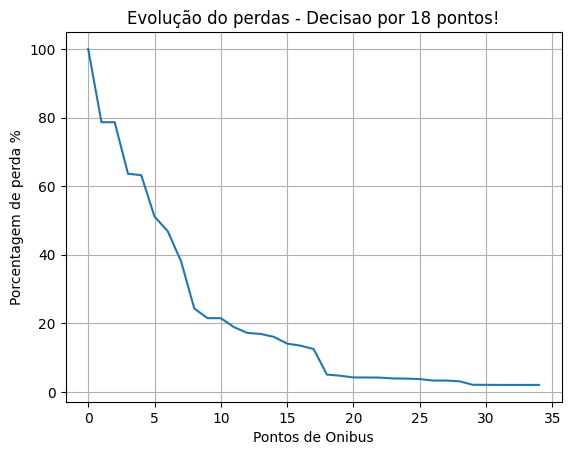

In [128]:
plt.plot(perdas)
plt.title('Evolução do perdas - Decisao por 18 pontos!')
plt.xlabel('Pontos de Onibus')
plt.ylabel('Porcentagem de perda %')
plt.grid()
plt.show()

In [129]:
perdas

[100.0,
 78.63059083379348,
 78.63059083379348,
 63.60436223081171,
 63.176421866372166,
 51.12506902263942,
 46.83186085035892,
 38.08669243511872,
 24.30287134180011,
 21.48674765323026,
 21.48674765323026,
 18.856985091109884,
 17.193539480949752,
 16.88983986747653,
 16.03395913859746,
 14.066813914964108,
 13.473219215902816,
 12.47929320817228,
 5.03865267807841,
 4.707344008834897,
 4.196576477084483,
 4.1896742131419105,
 4.155162893429045,
 3.913583655438984,
 3.858365543898399,
 3.7341247929320818,
 3.2923799006073993,
 3.2923799006073993,
 3.071507454445058,
 2.063776918829376,
 2.04997239094423,
 2.022363335173937,
 2.022363335173937,
 2.022363335173937,
 2.022363335173937]

In [130]:
[100.0,
 78.63059083379348,
 78.63059083379348,
 63.60436223081171,
 63.176421866372166,
 51.12506902263942,
 46.83186085035892,
 38.08669243511872,
 24.30287134180011,
 21.48674765323026,
 21.48674765323026,
 18.856985091109884,
 17.193539480949752,
 16.88983986747653,
 16.03395913859746,
 14.066813914964108,
 13.473219215902816,
 12.47929320817228,
 5.03865267807841,
 4.707344008834897,
 4.196576477084483,
 4.1896742131419105,
 4.155162893429045,
 3.913583655438984,
 3.858365543898399,
 3.7341247929320818,
 3.2923799006073993,
 3.2923799006073993,
 3.071507454445058,
 2.063776918829376,
 2.04997239094423,
 2.022363335173937,
 2.022363335173937,
 2.022363335173937,
 2.022363335173937]

[100.0,
 78.63059083379348,
 78.63059083379348,
 63.60436223081171,
 63.176421866372166,
 51.12506902263942,
 46.83186085035892,
 38.08669243511872,
 24.30287134180011,
 21.48674765323026,
 21.48674765323026,
 18.856985091109884,
 17.193539480949752,
 16.88983986747653,
 16.03395913859746,
 14.066813914964108,
 13.473219215902816,
 12.47929320817228,
 5.03865267807841,
 4.707344008834897,
 4.196576477084483,
 4.1896742131419105,
 4.155162893429045,
 3.913583655438984,
 3.858365543898399,
 3.7341247929320818,
 3.2923799006073993,
 3.2923799006073993,
 3.071507454445058,
 2.063776918829376,
 2.04997239094423,
 2.022363335173937,
 2.022363335173937,
 2.022363335173937,
 2.022363335173937]

## Demonstracao de Pivot/OD

In [131]:
agrupamento_junho = viagens_validas.groupby(['PontoInicial','PontoFinal']).agg({'sequence':'count'}).reset_index()
agrupamento_junho.pivot(index= 'PontoInicial', columns='PontoFinal', values='sequence').fillna(0)


# pivotttt = agrupamento_junho[   (agrupamento_junho['dataInicio'] == 6)  &
#                                     (agrupamento_junho['day'] == 1)         &
#                                     (agrupamento_junho['periodo'] == 'Tarde')].pivot(index= 'PontoInicial', columns='PontoFinal', values='sequence').fillna(0)
# pivotttt

PontoFinal,0,1,2,3,4,5,6,7,8,9,...,24,25,27,28,29,30,31,32,33,34
PontoInicial,,,,,,,,,,,,,,,,,,,,,
0,13.0,2.0,32.0,0.0,0.0,6.0,0.0,0.0,0.0,4.0,...,0.0,2.0,1.0,20.0,5.0,238.0,24.0,0.0,0.0,0.0
1,50.0,4.0,30.0,4.0,55.0,41.0,45.0,50.0,0.0,33.0,...,0.0,52.0,103.0,36.0,2.0,15.0,19.0,27.0,0.0,0.0
2,25.0,6.0,0.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,1.0,8.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,7.0,2.0,2.0,14.0,0.0,0.0,0.0
4,3.0,0.0,46.0,2.0,0.0,30.0,1.0,4.0,0.0,4.0,...,0.0,2.0,0.0,5.0,0.0,7.0,4.0,0.0,0.0,0.0
5,29.0,3.0,11.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,...,0.0,2.0,1.0,37.0,2.0,126.0,16.0,0.0,1.0,0.0
6,11.0,11.0,11.0,1.0,0.0,18.0,0.0,2.0,0.0,5.0,...,0.0,4.0,13.0,67.0,5.0,0.0,57.0,9.0,0.0,0.0
7,10.0,18.0,6.0,0.0,0.0,18.0,2.0,0.0,0.0,17.0,...,1.0,5.0,16.0,22.0,13.0,2.0,14.0,12.0,0.0,0.0
8,1.0,86.0,1.0,3.0,9.0,0.0,4.0,5.0,9.0,4.0,...,0.0,0.0,12.0,4.0,19.0,1.0,0.0,0.0,1.0,2.0


In [132]:
## pego uma serie de medianas
    ## rodo o kamedias e ele adequa quais ptos de onibus serao representados por essas medianas
    ## calculo distancia 
    ## guardo a menor distancia e a quais pontos ela corresponte